In [1]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=1.2)
import pandas as pd
from sklearn.model_selection import KFold
import scipy.stats
import warnings
from copy import copy

warnings.filterwarnings("ignore")
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
#Plotting function
from PlotDecodingResults import ModelPredictionPlots
from sklearn.model_selection import train_test_split
from sklearn.utils.random import sample_without_replacement
from RunKeras import NaiveBayes as nb
from RunKeras import PreprocessData as pred
from RunKeras import PrepareBehaviorData as pbd

nb = nb()
m = ModelPredictionPlots()

Using TensorFlow backend.


Validation functions


## Prepare datasets

In [3]:
task_dict = {'Task1':'1 Fam Rew', 
             'Task2':'2 No Rew No Lick', 
             'Task3':'3 Fam Rew', 
             'Task4':'4 Nov Rew'}

In [4]:
FolderName = '/home/sheffieldlab/Desktop/NoReward/ImagingData/Good_behavior/NR6/'

frame_lick_stop = 5154
task_numframes = {'Task1': 20000, 
                  'Task2': 20000, 
                  'Task3': 15000, 
                  'Task4': 15000}
#Track Parameters
tracklength = 200 #2m track
trackbins = 5 #5cm bins

In [5]:
from Placecells_and_LickCorrelation_EachAnimal import GetData as gd
A = gd(FolderName=FolderName, Task_NumFrames=task_numframes, TaskDict=task_dict, lick_stop=frame_lick_stop)

Number of PlaceCells in Task2 is 129
Number of PlaceCells in Task1 is 133
Number of PlaceCells in Task3 is 123
Number of PlaceCells in Task4 is 119
Number of PlaceCells in Task2a is 129


### Control Data

In [6]:
# Get Xdata - calcium data and Ydata - running behavior
X = A.Fc3data_dict['Task1'][:, A.Parsed_Behavior['good_running_index'].item()['Task1']].T
Y = A.Parsed_Behavior['good_running_data'].item()['Task1']
print(np.shape(X), np.shape(Y))
X, Y = pred.equalise_laps_with_numlaps_innorew(A, X, Y, 'Task1')
print('Lap Corrected', np.shape(X), np.shape(Y))

(12298, 316) (12298, 1)
Number of laps being chosen 22
[17 37 34 18 32  1 22  2  9 36 29 21 13 27  5 15 20 24 11  0 12 30]
Lap Corrected (6277, 316) (6277, 1)


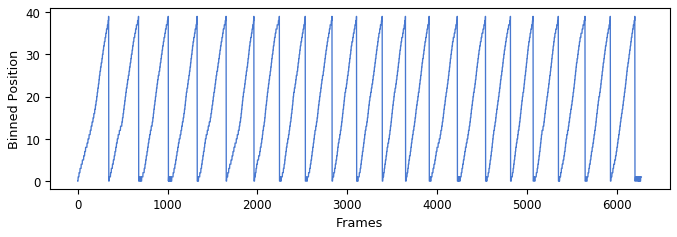

In [7]:
B = pbd(BehaviorData=Y, tracklength=tracklength, trackbins=trackbins)
y_cat = B.position_binary

### No Rew Data

In [8]:
# Get Xdata - calcium data and Ydata - running behavior
X_Norew = A.Fc3data_dict['Task2'][:, A.Parsed_Behavior['good_running_index'].item()['Task2']].T
Y_Norew = A.Parsed_Behavior['good_running_data'].item()['Task2']
print('Total shape:', np.shape(X_Norew), np.shape(Y_Norew))

#Keep frames after lick stops in no reward condition
X_Norew, Y_Norew = pred.get_frames_afterlickstops(Imgobj=A, X_norew=X_Norew, Y_norew=Y_Norew)
print('After lick stops:', np.shape(X_Norew), np.shape(Y_Norew))

Total shape: (10058, 316) (10058, 1)
After lick stops: (7460, 316) (7460, 1)


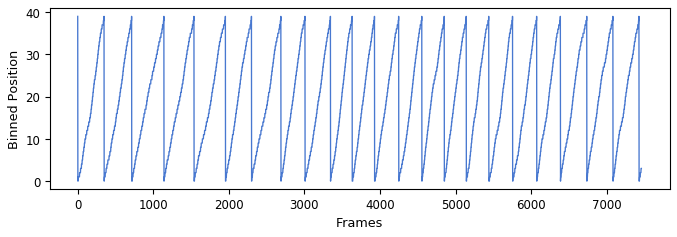

In [9]:
B = pbd(BehaviorData=Y_Norew, tracklength=tracklength, trackbins=trackbins)
y_cat_norew = B.position_binary

### Reward2 data

In [10]:
# Get Xdata - calcium data and Ydata - running behavior
X_rew2 = A.Fc3data_dict['Task3'][:, A.Parsed_Behavior['good_running_index'].item()['Task3']].T
Y_rew2 = A.Parsed_Behavior['good_running_data'].item()['Task3']
print(np.shape(X_rew2), np.shape(Y_rew2))
X_rew2, Y_rew2 = pred.equalise_laps_with_numlaps_innorew(A, X_rew2, Y_rew2, 'Task3')
print('Lap Corrected', np.shape(X_rew2), np.shape(Y_rew2))

(7072, 316) (7072, 1)
Number of laps being chosen 22
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Lap Corrected (6001, 316) (6001, 1)


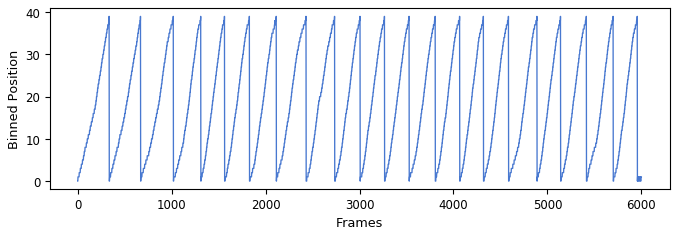

In [11]:
B = pbd(BehaviorData=Y_rew2, tracklength=tracklength, trackbins=trackbins)
y_cat_rew2 = B.position_binary

### Novel Data

In [12]:
# Get Xdata - calcium data and Ydata - running behavior
X_nov = A.Fc3data_dict['Task4'][:, A.Parsed_Behavior['good_running_index'].item()['Task4']].T
Y_nov = A.Parsed_Behavior['good_running_data'].item()['Task4']
print(np.shape(X_nov), np.shape(Y_nov))
X_nov, Y_nov = pred.equalise_laps_with_numlaps_innorew(A, X_nov, Y_nov, 'Task4')
print('Lap Corrected', np.shape(X_nov), np.shape(Y_nov))

(11044, 316) (11044, 1)
Number of laps being chosen 22
[26  2  6 27 18 11 24 17  4  5 22 15 21 14 20 13 23 28  9 10  7 12]
Lap Corrected (6917, 316) (6917, 1)


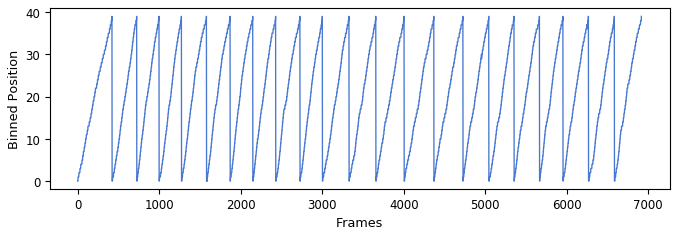

In [13]:
B = pbd(BehaviorData=Y_nov, tracklength=tracklength, trackbins=trackbins)
y_cat_nov = B.position_binary

## Run Bayes on each data seperately 

In [14]:
X_data = [X, X_Norew, X_rew2, X_nov]
Y_data = [y_cat, y_cat_norew, y_cat_rew2, y_cat_nov]
TaskName = task_dict.keys()

Decoding... 1 Fam Rew
(5649, 316) (628, 316) (5649,) (628,)

Accuracy of test set:: 0.26%


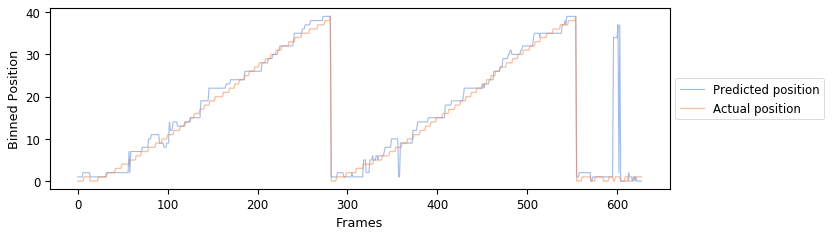

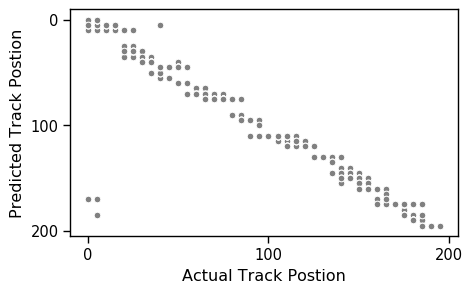

R2: 0.91
rho: 0.96


Decoding... 2 No Rew No Lick
(6714, 316) (746, 316) (6714,) (746,)

Accuracy of test set:: 0.18%


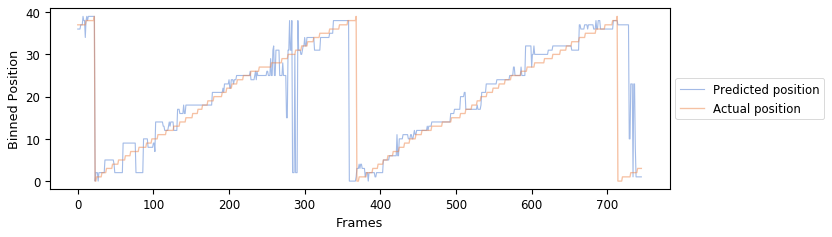

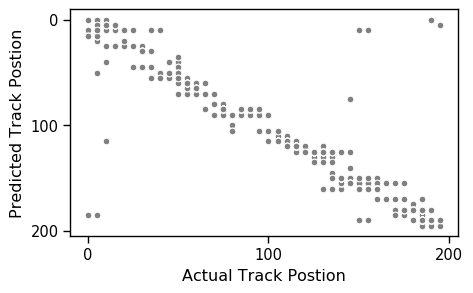

R2: 0.57
rho: 0.78


Decoding... 3 Fam Rew
(5400, 316) (601, 316) (5400,) (601,)

Accuracy of test set:: 0.31%


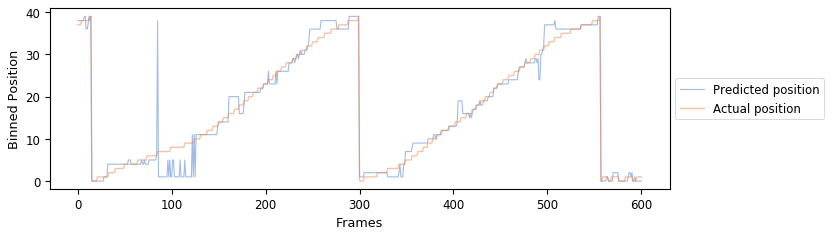

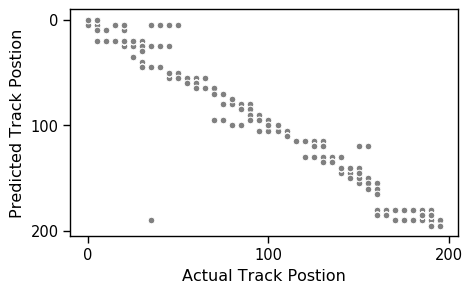

R2: 0.96
rho: 0.98


Decoding... 4 Nov Rew
(6225, 316) (692, 316) (6225,) (692,)

Accuracy of test set:: 0.11%


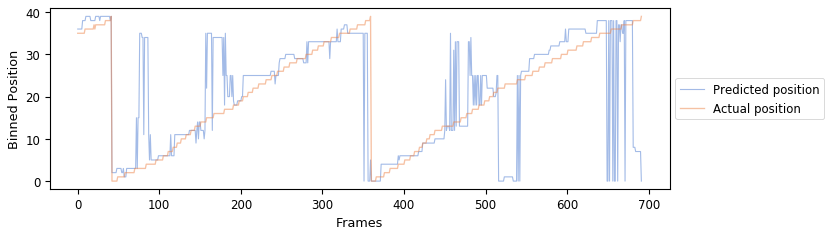

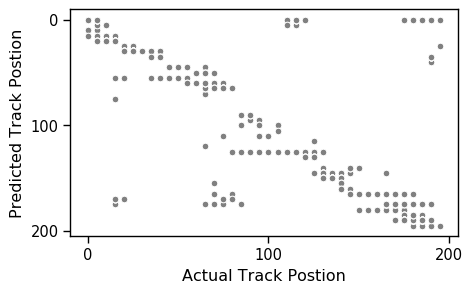

R2: 0.34
rho: 0.71




In [15]:
for x, y, t in zip(X_data, Y_data, TaskName):
    print('Decoding...', task_dict[t])
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=None, shuffle=False)
    print(np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))
    gaussianNB = nb.fit_naivebayes(X_train, y_train)
    scores, y_predicted, y_errorprob = nb.validate_model(gaussianNB, X_test, y_test)
    m.plot_accuracy_scatterplot(y_test, y_predicted, trackbins)
    R2 = m.get_R2(y_test, y_predicted)
    rho = m.get_rho(y_test, y_predicted)
    print(f'R2: %.2f' %R2)
    print(f'rho: %.2f\n\n' %rho)

## Prediction accuracy with number of cells for all tasks

### Control data

In [16]:
numsamples, R2_numcells_dict_cntrl, rho_numcells_dict_cntrl = nb.decoderaccuracy_wtih_numcells(X_data=X, Y_data=y_cat, iterations=100)

Validation functions
Fitting on 31 neurons

Accuracy of test set:: 0.19%

Accuracy of test set:: 0.10%

Accuracy of test set:: 0.19%

Accuracy of test set:: 0.12%

Accuracy of test set:: 0.11%

Accuracy of test set:: 0.14%

Accuracy of test set:: 0.10%

Accuracy of test set:: 0.17%

Accuracy of test set:: 0.14%

Accuracy of test set:: 0.14%

Accuracy of test set:: 0.14%

Accuracy of test set:: 0.11%

Accuracy of test set:: 0.19%

Accuracy of test set:: 0.17%

Accuracy of test set:: 0.07%

Accuracy of test set:: 0.10%

Accuracy of test set:: 0.20%

Accuracy of test set:: 0.10%

Accuracy of test set:: 0.11%

Accuracy of test set:: 0.13%

Accuracy of test set:: 0.09%

Accuracy of test set:: 0.11%

Accuracy of test set:: 0.12%

Accuracy of test set:: 0.10%

Accuracy of test set:: 0.16%

Accuracy of test set:: 0.10%

Accuracy of test set:: 0.19%

Accuracy of test set:: 0.16%

Accuracy of test set:: 0.14%

Accuracy of test set:: 0.09%

Accuracy of test set:: 0.24%

Accuracy of test set:: 0.1


Accuracy of test set:: 0.27%

Accuracy of test set:: 0.23%

Accuracy of test set:: 0.24%

Accuracy of test set:: 0.23%

Accuracy of test set:: 0.27%

Accuracy of test set:: 0.21%

Accuracy of test set:: 0.21%

Accuracy of test set:: 0.20%

Accuracy of test set:: 0.28%

Accuracy of test set:: 0.27%

Accuracy of test set:: 0.25%

Accuracy of test set:: 0.18%

Accuracy of test set:: 0.18%

Accuracy of test set:: 0.18%

Accuracy of test set:: 0.21%

Accuracy of test set:: 0.18%

Accuracy of test set:: 0.25%

Accuracy of test set:: 0.26%

Accuracy of test set:: 0.21%

Accuracy of test set:: 0.21%

Accuracy of test set:: 0.25%

Accuracy of test set:: 0.22%

Accuracy of test set:: 0.30%

Accuracy of test set:: 0.25%

Accuracy of test set:: 0.26%

Accuracy of test set:: 0.32%

Accuracy of test set:: 0.28%

Accuracy of test set:: 0.24%
Fitting on 252 neurons

Accuracy of test set:: 0.26%

Accuracy of test set:: 0.29%

Accuracy of test set:: 0.27%

Accuracy of test set:: 0.27%

Accuracy of test

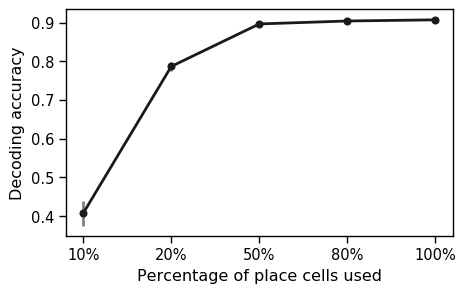

In [17]:
mean_R2_cntrl, sem_R2_cntrl = nb.plot_decoderaccuracy_with_numcells(R2_numcells_dict_cntrl, numsamples)

### No reward data

In [18]:
numsamples, R2_numcells_dict_norew, rho_numcells_dict_norew = nb.decoderaccuracy_wtih_numcells(X_data=X_Norew, Y_data=y_cat_norew, iterations=100)

Validation functions
Fitting on 31 neurons

Accuracy of test set:: 0.12%

Accuracy of test set:: 0.10%

Accuracy of test set:: 0.11%

Accuracy of test set:: 0.11%

Accuracy of test set:: 0.11%

Accuracy of test set:: 0.07%

Accuracy of test set:: 0.11%

Accuracy of test set:: 0.06%

Accuracy of test set:: 0.09%

Accuracy of test set:: 0.10%

Accuracy of test set:: 0.06%

Accuracy of test set:: 0.09%

Accuracy of test set:: 0.10%

Accuracy of test set:: 0.09%

Accuracy of test set:: 0.09%

Accuracy of test set:: 0.16%

Accuracy of test set:: 0.12%

Accuracy of test set:: 0.12%

Accuracy of test set:: 0.08%

Accuracy of test set:: 0.15%

Accuracy of test set:: 0.07%

Accuracy of test set:: 0.08%

Accuracy of test set:: 0.04%

Accuracy of test set:: 0.06%

Accuracy of test set:: 0.06%

Accuracy of test set:: 0.15%

Accuracy of test set:: 0.08%

Accuracy of test set:: 0.15%

Accuracy of test set:: 0.09%

Accuracy of test set:: 0.10%

Accuracy of test set:: 0.12%

Accuracy of test set:: 0.0


Accuracy of test set:: 0.22%

Accuracy of test set:: 0.18%

Accuracy of test set:: 0.13%

Accuracy of test set:: 0.17%

Accuracy of test set:: 0.24%

Accuracy of test set:: 0.17%

Accuracy of test set:: 0.20%

Accuracy of test set:: 0.21%

Accuracy of test set:: 0.18%

Accuracy of test set:: 0.21%

Accuracy of test set:: 0.14%

Accuracy of test set:: 0.21%

Accuracy of test set:: 0.19%

Accuracy of test set:: 0.19%

Accuracy of test set:: 0.16%

Accuracy of test set:: 0.19%

Accuracy of test set:: 0.16%

Accuracy of test set:: 0.17%

Accuracy of test set:: 0.16%

Accuracy of test set:: 0.22%

Accuracy of test set:: 0.18%

Accuracy of test set:: 0.18%

Accuracy of test set:: 0.25%

Accuracy of test set:: 0.14%

Accuracy of test set:: 0.17%

Accuracy of test set:: 0.20%

Accuracy of test set:: 0.14%

Accuracy of test set:: 0.20%
Fitting on 252 neurons

Accuracy of test set:: 0.15%

Accuracy of test set:: 0.19%

Accuracy of test set:: 0.21%

Accuracy of test set:: 0.14%

Accuracy of test

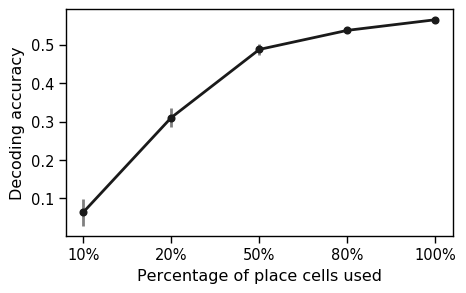

In [19]:
mean_R2_norew, sem_R2_norew = nb.plot_decoderaccuracy_with_numcells(R2_numcells_dict_norew, numsamples)

### Reward2 data

In [20]:
numsamples, R2_numcells_dict_rew2, rho_numcells_dict_rew2 = nb.decoderaccuracy_wtih_numcells(X_data=X_rew2, Y_data=y_cat_rew2, iterations=100)

Validation functions
Fitting on 31 neurons

Accuracy of test set:: 0.08%

Accuracy of test set:: 0.19%

Accuracy of test set:: 0.17%

Accuracy of test set:: 0.11%

Accuracy of test set:: 0.11%

Accuracy of test set:: 0.12%

Accuracy of test set:: 0.09%

Accuracy of test set:: 0.11%

Accuracy of test set:: 0.11%

Accuracy of test set:: 0.09%

Accuracy of test set:: 0.13%

Accuracy of test set:: 0.17%

Accuracy of test set:: 0.06%

Accuracy of test set:: 0.22%

Accuracy of test set:: 0.15%

Accuracy of test set:: 0.12%

Accuracy of test set:: 0.22%

Accuracy of test set:: 0.10%

Accuracy of test set:: 0.17%

Accuracy of test set:: 0.11%

Accuracy of test set:: 0.16%

Accuracy of test set:: 0.13%

Accuracy of test set:: 0.11%

Accuracy of test set:: 0.19%

Accuracy of test set:: 0.08%

Accuracy of test set:: 0.14%

Accuracy of test set:: 0.13%

Accuracy of test set:: 0.10%

Accuracy of test set:: 0.08%

Accuracy of test set:: 0.13%

Accuracy of test set:: 0.10%

Accuracy of test set:: 0.1


Accuracy of test set:: 0.27%

Accuracy of test set:: 0.29%

Accuracy of test set:: 0.22%

Accuracy of test set:: 0.29%

Accuracy of test set:: 0.27%

Accuracy of test set:: 0.24%

Accuracy of test set:: 0.23%

Accuracy of test set:: 0.22%

Accuracy of test set:: 0.28%

Accuracy of test set:: 0.25%

Accuracy of test set:: 0.27%

Accuracy of test set:: 0.26%

Accuracy of test set:: 0.28%

Accuracy of test set:: 0.29%

Accuracy of test set:: 0.24%

Accuracy of test set:: 0.28%

Accuracy of test set:: 0.30%

Accuracy of test set:: 0.27%

Accuracy of test set:: 0.26%

Accuracy of test set:: 0.28%

Accuracy of test set:: 0.26%

Accuracy of test set:: 0.28%

Accuracy of test set:: 0.29%

Accuracy of test set:: 0.27%

Accuracy of test set:: 0.29%

Accuracy of test set:: 0.28%
Fitting on 252 neurons

Accuracy of test set:: 0.29%

Accuracy of test set:: 0.28%

Accuracy of test set:: 0.34%

Accuracy of test set:: 0.32%

Accuracy of test set:: 0.34%

Accuracy of test set:: 0.29%

Accuracy of test

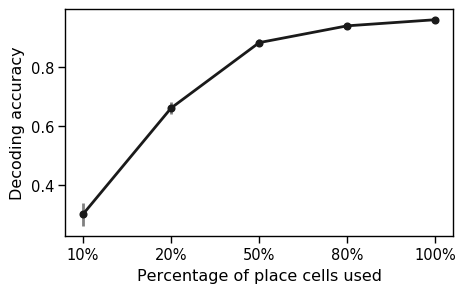

In [21]:
mean_R2_rew2, sem_R2_rew2 = nb.plot_decoderaccuracy_with_numcells(R2_numcells_dict_rew2, numsamples)

### Novel Data

In [22]:
numsamples, R2_numcells_dict_nov, rho_numcells_dict_nov = nb.decoderaccuracy_wtih_numcells(X_data=X_nov, Y_data=y_cat_nov, iterations=100)

Validation functions
Fitting on 31 neurons

Accuracy of test set:: 0.10%

Accuracy of test set:: 0.08%

Accuracy of test set:: 0.08%

Accuracy of test set:: 0.08%

Accuracy of test set:: 0.17%

Accuracy of test set:: 0.09%

Accuracy of test set:: 0.09%

Accuracy of test set:: 0.06%

Accuracy of test set:: 0.05%

Accuracy of test set:: 0.09%

Accuracy of test set:: 0.11%

Accuracy of test set:: 0.16%

Accuracy of test set:: 0.11%

Accuracy of test set:: 0.15%

Accuracy of test set:: 0.07%

Accuracy of test set:: 0.08%

Accuracy of test set:: 0.10%

Accuracy of test set:: 0.05%

Accuracy of test set:: 0.07%

Accuracy of test set:: 0.11%

Accuracy of test set:: 0.07%

Accuracy of test set:: 0.05%

Accuracy of test set:: 0.09%

Accuracy of test set:: 0.04%

Accuracy of test set:: 0.11%

Accuracy of test set:: 0.08%

Accuracy of test set:: 0.04%

Accuracy of test set:: 0.04%

Accuracy of test set:: 0.11%

Accuracy of test set:: 0.08%

Accuracy of test set:: 0.07%

Accuracy of test set:: 0.1


Accuracy of test set:: 0.14%

Accuracy of test set:: 0.14%

Accuracy of test set:: 0.12%

Accuracy of test set:: 0.15%

Accuracy of test set:: 0.19%

Accuracy of test set:: 0.16%

Accuracy of test set:: 0.16%

Accuracy of test set:: 0.14%

Accuracy of test set:: 0.12%

Accuracy of test set:: 0.12%

Accuracy of test set:: 0.13%

Accuracy of test set:: 0.15%

Accuracy of test set:: 0.12%

Accuracy of test set:: 0.18%

Accuracy of test set:: 0.11%

Accuracy of test set:: 0.15%

Accuracy of test set:: 0.19%

Accuracy of test set:: 0.11%

Accuracy of test set:: 0.14%

Accuracy of test set:: 0.13%

Accuracy of test set:: 0.16%

Accuracy of test set:: 0.11%

Accuracy of test set:: 0.14%

Accuracy of test set:: 0.13%

Accuracy of test set:: 0.11%

Accuracy of test set:: 0.15%

Accuracy of test set:: 0.09%

Accuracy of test set:: 0.16%
Fitting on 252 neurons

Accuracy of test set:: 0.12%

Accuracy of test set:: 0.12%

Accuracy of test set:: 0.14%

Accuracy of test set:: 0.09%

Accuracy of test

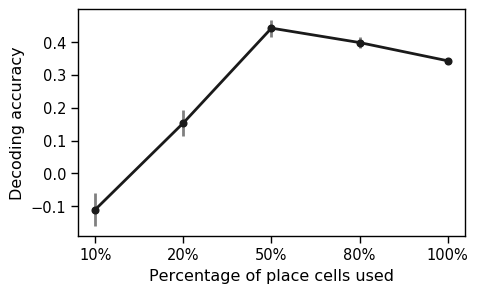

In [23]:
mean_R2_nov, sem_R2_nov = nb.plot_decoderaccuracy_with_numcells(R2_numcells_dict_nov, numsamples)

### Plot it all together

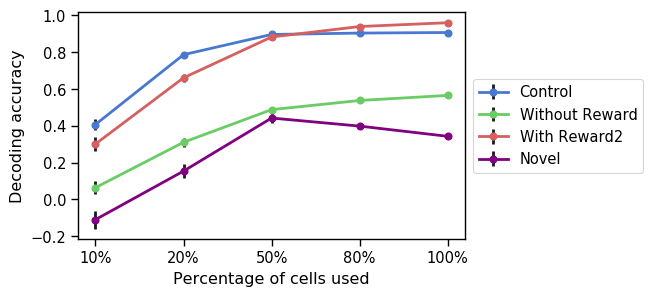

In [24]:
plt.figure(figsize=(5, 3), dpi=100)
plt.errorbar(np.arange(np.size(numsamples)), mean_R2_cntrl, yerr=sem_R2_cntrl, color='b', fmt='o-', ecolor='k', capthick=5, linewidth=2, label='Control')
plt.errorbar(np.arange(np.size(numsamples)), mean_R2_norew, yerr=sem_R2_norew, color='g', fmt='o-', ecolor='k', capthick=5, linewidth=2, label='Without Reward')
plt.errorbar(np.arange(np.size(numsamples)), mean_R2_rew2, yerr=sem_R2_rew2, color='r', fmt='o-', ecolor='k', capthick=5, linewidth=2, label='With Reward2')
plt.errorbar(np.arange(np.size(numsamples)), mean_R2_nov, yerr=sem_R2_nov, color='purple', fmt='o-', ecolor='k', capthick=5, linewidth=2, label='Novel')

plt.xticks(np.arange(np.size(numsamples)), ['10%', '20%', '50%', '80%', '100%'])
plt.xlabel('Percentage of cells used')
plt.ylabel('Decoding accuracy');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))